In [1]:
# Loading the libararies 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
data = pd.read_csv("task 1(EDA) (Titanic).csv")

# Data Understanding

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
data.shape

(891, 12)

In [6]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
data.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,891
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,645


In [8]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [10]:
data["Survived"].unique()

array([0, 1])

In [11]:
# unique value in sibsap
data["SibSp"].unique()

array([1, 0, 3, 4, 2, 5, 8])

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
# Data types of the columns 
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [14]:
# Computing frequency of values in categorical columns
categorical_columns = ['Sex', 'Embarked', 'Pclass', 'Survived']  # Specify your categorical columns
for column in categorical_columns:
    print(f"Value counts for {column}:\n")
    print(data[column].value_counts())
    print("\n")

Value counts for Sex:

Sex
male      577
female    314
Name: count, dtype: int64


Value counts for Embarked:

Embarked
S    645
C    168
Q     78
Name: count, dtype: int64


Value counts for Pclass:

Pclass
3    491
1    216
2    184
Name: count, dtype: int64


Value counts for Survived:

Survived
0    549
1    342
Name: count, dtype: int64




In [15]:
# Survival rate percentage
data["Survived"].value_counts(normalize=True)*100

Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64

# Data Cleaning 

In [16]:
# finding teh null values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

<Axes: >

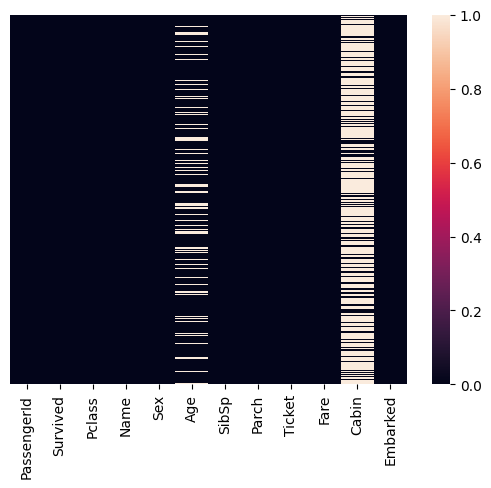

In [17]:
sns.heatmap(data.isnull(),yticklabels= False)

In [18]:
data["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [19]:
data["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

C:\Users\sadia\AppData\Local\Temp\ipykernel_15616\976203938.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived',data=data,ax=axes[0,0], palette = "RdBu_r")
C:\Users\sadia\AppData\Local\Temp\ipykernel_15616\976203938.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Pclass',data=data,ax=axes[0,1], palette = "RdBu_r")
C:\Users\sadia\AppData\Local\Temp\ipykernel_15616\976203938.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex',data=data,ax=axes[0,2], palette = "RdBu_r")
C:\Users\sadia\AppData\Local\Temp\ipykern

<Axes: ylabel='Density'>

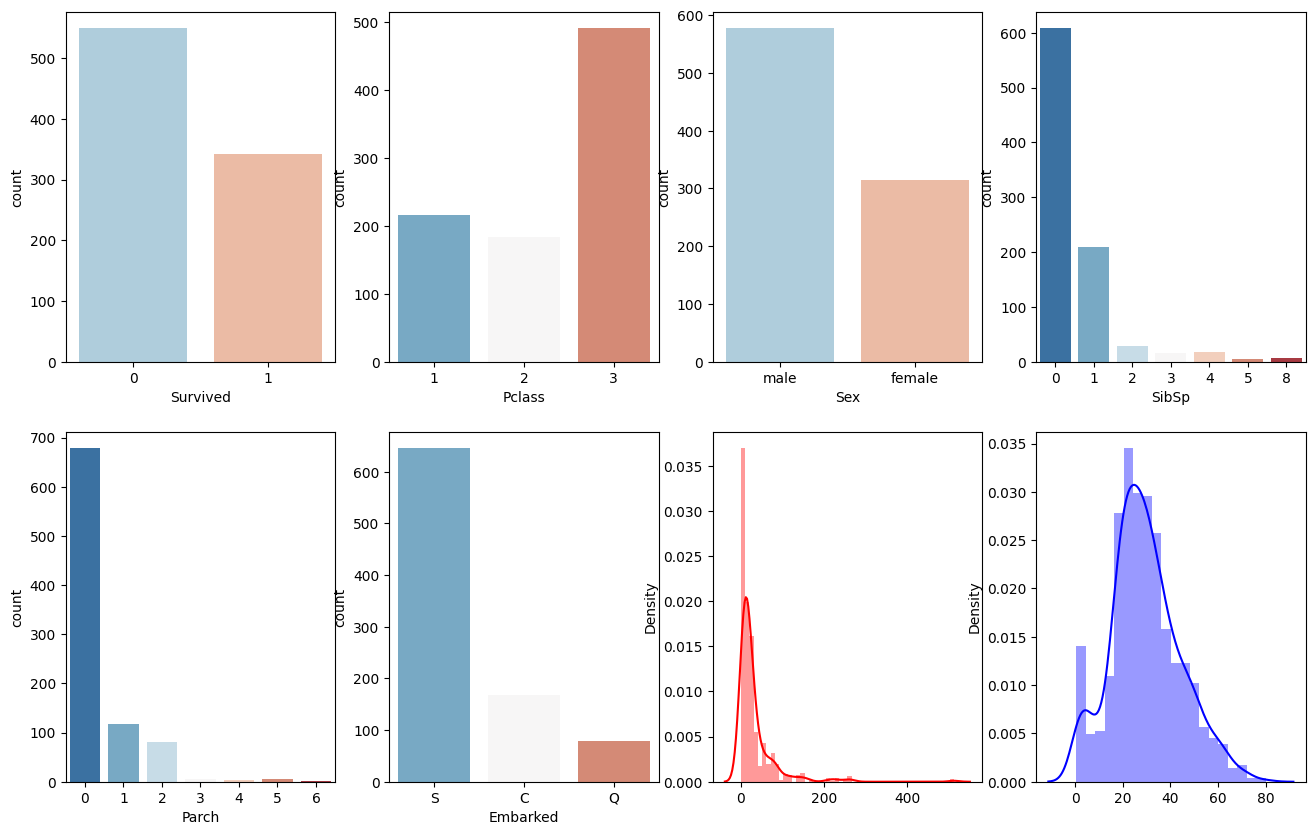

In [20]:
fig, axes = plt.subplots(2, 4, figsize=(16, 10) )
sns.countplot(x='Survived',data=data,ax=axes[0,0], palette = "RdBu_r")
sns.countplot(x='Pclass',data=data,ax=axes[0,1], palette = "RdBu_r")
sns.countplot(x='Sex',data=data,ax=axes[0,2], palette = "RdBu_r")
sns.countplot(x='SibSp',data=data,ax=axes[0,3],palette = "RdBu_r")
sns.countplot(x='Parch',data=data,ax=axes[1,0], palette = "RdBu_r")
sns.countplot(x='Embarked',data=data,ax=axes[1,1], palette = "RdBu_r")
sns.distplot(x=data['Fare'], kde=True,ax=axes[1,2], color = "red")
sns.distplot(x= data['Age'].dropna(),kde=True,ax=axes[1,3], color = "blue")

<Axes: xlabel='Survived', ylabel='count'>

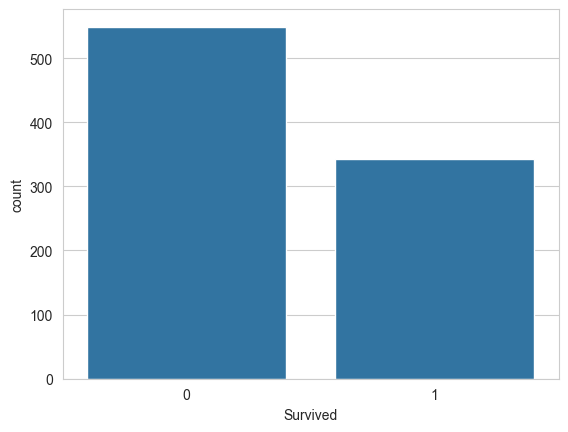

In [21]:
sns.set_style("whitegrid")
sns.countplot( data , x='Survived'  )

In [22]:
print(data.groupby(['Survived', 'Sex']).size())

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
dtype: int64


<Axes: xlabel='Survived', ylabel='count'>

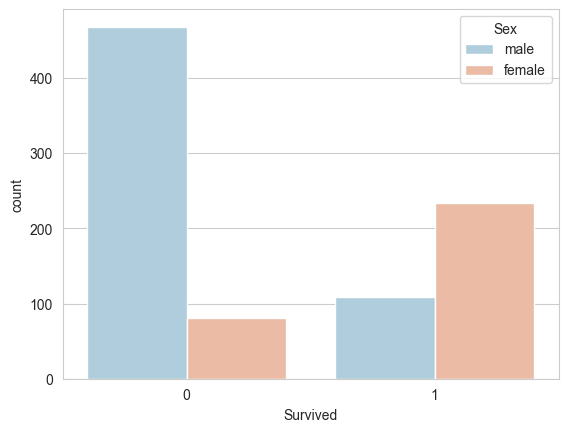

In [23]:
sns.set_style("whitegrid")
sns.countplot(x= "Survived" , hue = "Sex", data = data , palette = "RdBu_r" )


<Axes: xlabel='Survived', ylabel='count'>

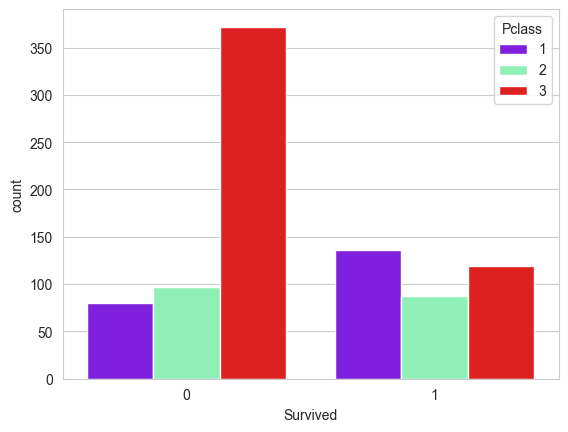

In [24]:
sns.set_style("whitegrid")
sns.countplot(x= "Survived" , hue = "Pclass", data = data , palette = "rainbow" )

C:\Users\sadia\AppData\Local\Temp\ipykernel_15616\3934762031.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Age"].dropna(), kde= False , color = "red", bins=40)


<Axes: xlabel='Age'>

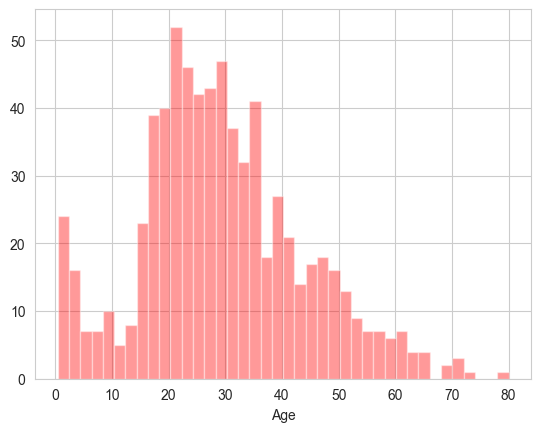

In [25]:
sns.distplot(data["Age"].dropna(), kde= False , color = "red", bins=40)

<Axes: >

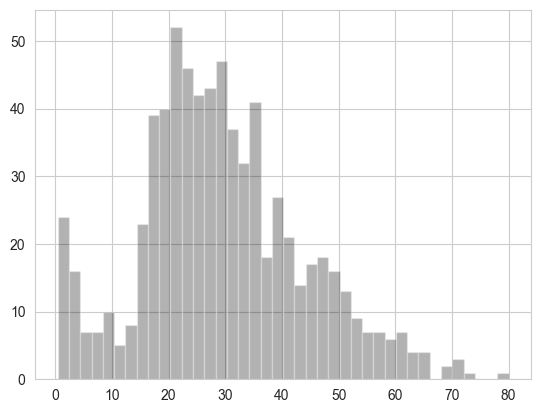

In [26]:
data["Age"].hist(bins=40 , color= "black" , alpha = 0.3)

C:\Users\sadia\AppData\Local\Temp\ipykernel_15616\3825305932.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data, x="SibSp" , palette="husl")


<Axes: xlabel='SibSp', ylabel='count'>

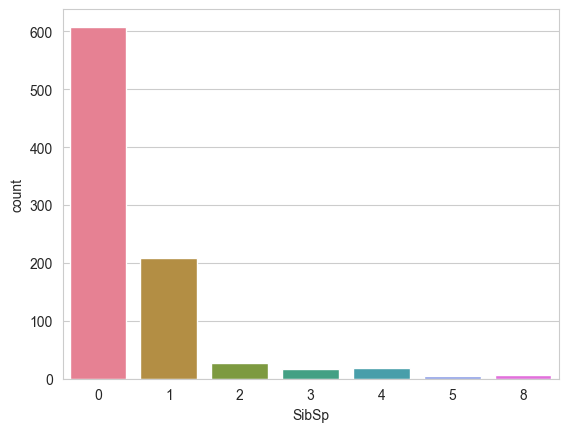

In [27]:
sns.countplot(data, x="SibSp" , palette="husl")

<Axes: >

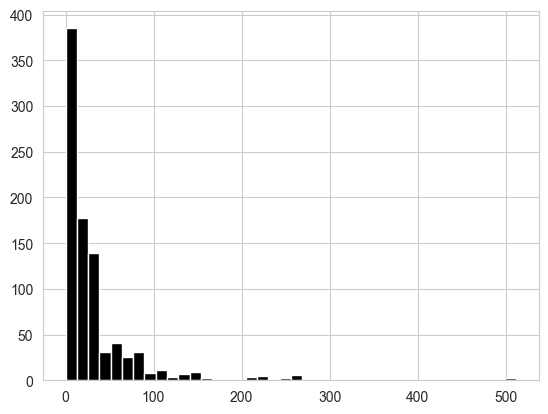

In [28]:
data["Fare"].hist(color="black" , bins=40 )

C:\Users\sadia\AppData\Local\Temp\ipykernel_15616\3810949265.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data,x= "Survived" , y="Age" , palette="pastel" )


<Axes: xlabel='Survived', ylabel='Age'>

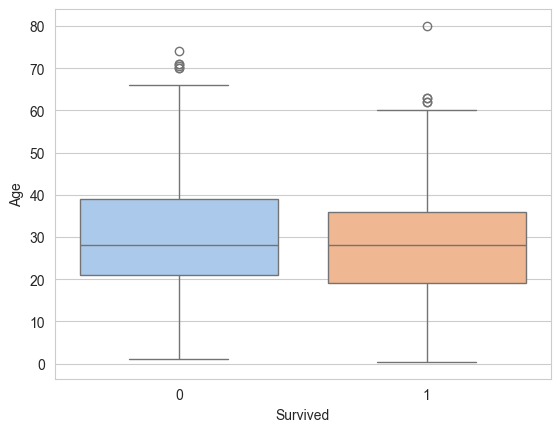

In [29]:
# find the relationship between the age and Pclass with the help of box plot
sns.boxplot(data,x= "Survived" , y="Age" , palette="pastel" )

In [30]:
mean_age_survived = data.groupby("Survived")["Age"].mean()
mean_age_survived

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

In [31]:
def fill_age(row):
    Age = row["Age"]
    Survived = row["Survived"]
    # print(f"Processing row: Age={Age}, Survived={Survived}")
    
    if pd.isna(Age):  
        if Survived == 0:
            # print("Replacing with mean for Survived=0")
            return mean_age_survived[0]
        elif Survived == 1:
            # print("Replacing with mean for Survived=1")
            return mean_age_survived[1]
    else:
        # print("Age not NaN, keeping original value")
        return Age


In [32]:
# Apply the function to fill NaN values
data["Age"] = data.apply(fill_age, axis=1)


In [33]:
# # data.dropna(inplace=True) 
# age = data["Age"].mean()
# age
# data["Age"].fillna(age, inplace=True) 

In [34]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

<Axes: >

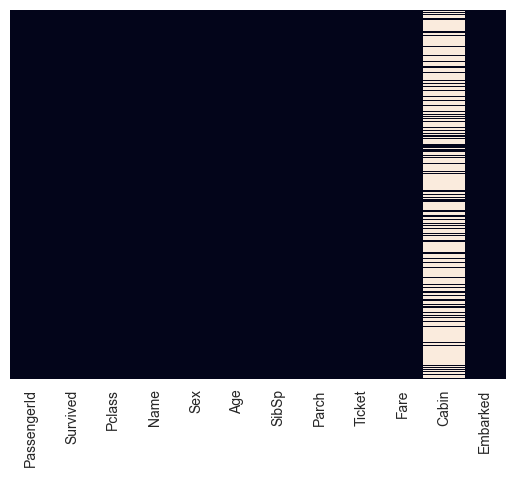

In [35]:
sns.heatmap(data.isnull(), yticklabels = False , cbar = False )

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# removing the columns

In [37]:
# Remove the Cabin  Column as we do not need it and also it has alot of missing values 
data= data.drop(columns=["Cabin"])

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [39]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [40]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<Axes: >

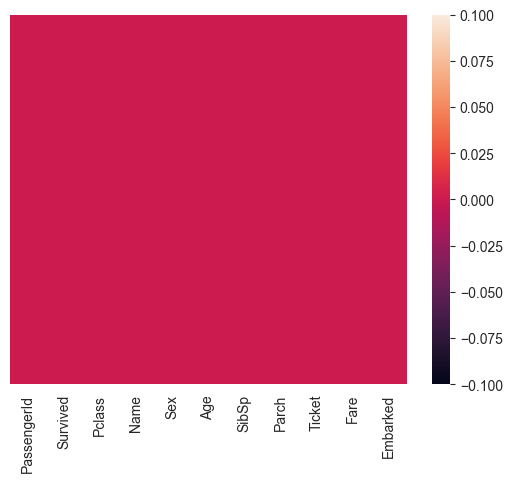

In [41]:
sns.heatmap(data.isnull(), yticklabels= False)

# Removing categorical feature into Numerical feature 

In [42]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [43]:
# use get dummies
sex= pd.get_dummies(data['Sex'] ,dtype = int)
sex

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [44]:
# embarked = pd.get_dummies(data['Embarked'], drop_first = True , dtype = int).head()
# use drop_first as  the 3rd colum we can get via other 2 colums 
embarked = pd.get_dummies(data['Embarked'], dtype = int)
embarked

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [45]:
# Drop all teh columns tahat can not be requred  

data.drop(["Name",  "Sex", "Ticket", "Embarked"], axis = 1 , inplace = True)

In [46]:
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [47]:
data= pd.concat([data, sex, embarked], axis= 1)
data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,1,0,3,22.000000,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.000000,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.000000,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.000000,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.000000,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,0,1,0,0,1
887,888,1,1,19.000000,0,0,30.0000,1,0,0,0,1
888,889,0,3,30.626179,1,2,23.4500,1,0,0,0,1
889,890,1,1,26.000000,0,0,30.0000,0,1,1,0,0


In [48]:
data.tail()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
886,887,0,2,27.000000,0,0,13.00,0,1,0,0,1
887,888,1,1,19.000000,0,0,30.00,1,0,0,0,1
888,889,0,3,30.626179,1,2,23.45,1,0,0,0,1
889,890,1,1,26.000000,0,0,30.00,0,1,1,0,0
890,891,0,3,32.000000,0,0,7.75,0,1,0,1,0


In [49]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
female           int64
male             int64
C                int64
Q                int64
S                int64
dtype: object

In [50]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
female         0
male           0
C              0
Q              0
S              0
dtype: int64

# RELATIONSHIP ANALYSIS

In [51]:
# To find the correlation
correlation = data.corr() 

<Axes: >

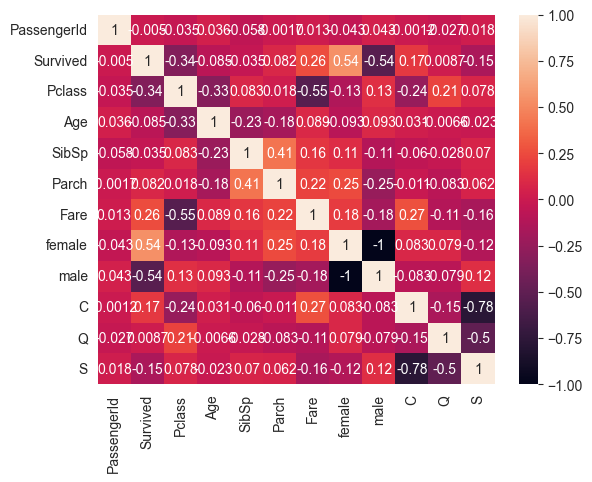

In [52]:
sns.heatmap(correlation, xticklabels = correlation.columns , yticklabels =correlation.columns , annot = True  )

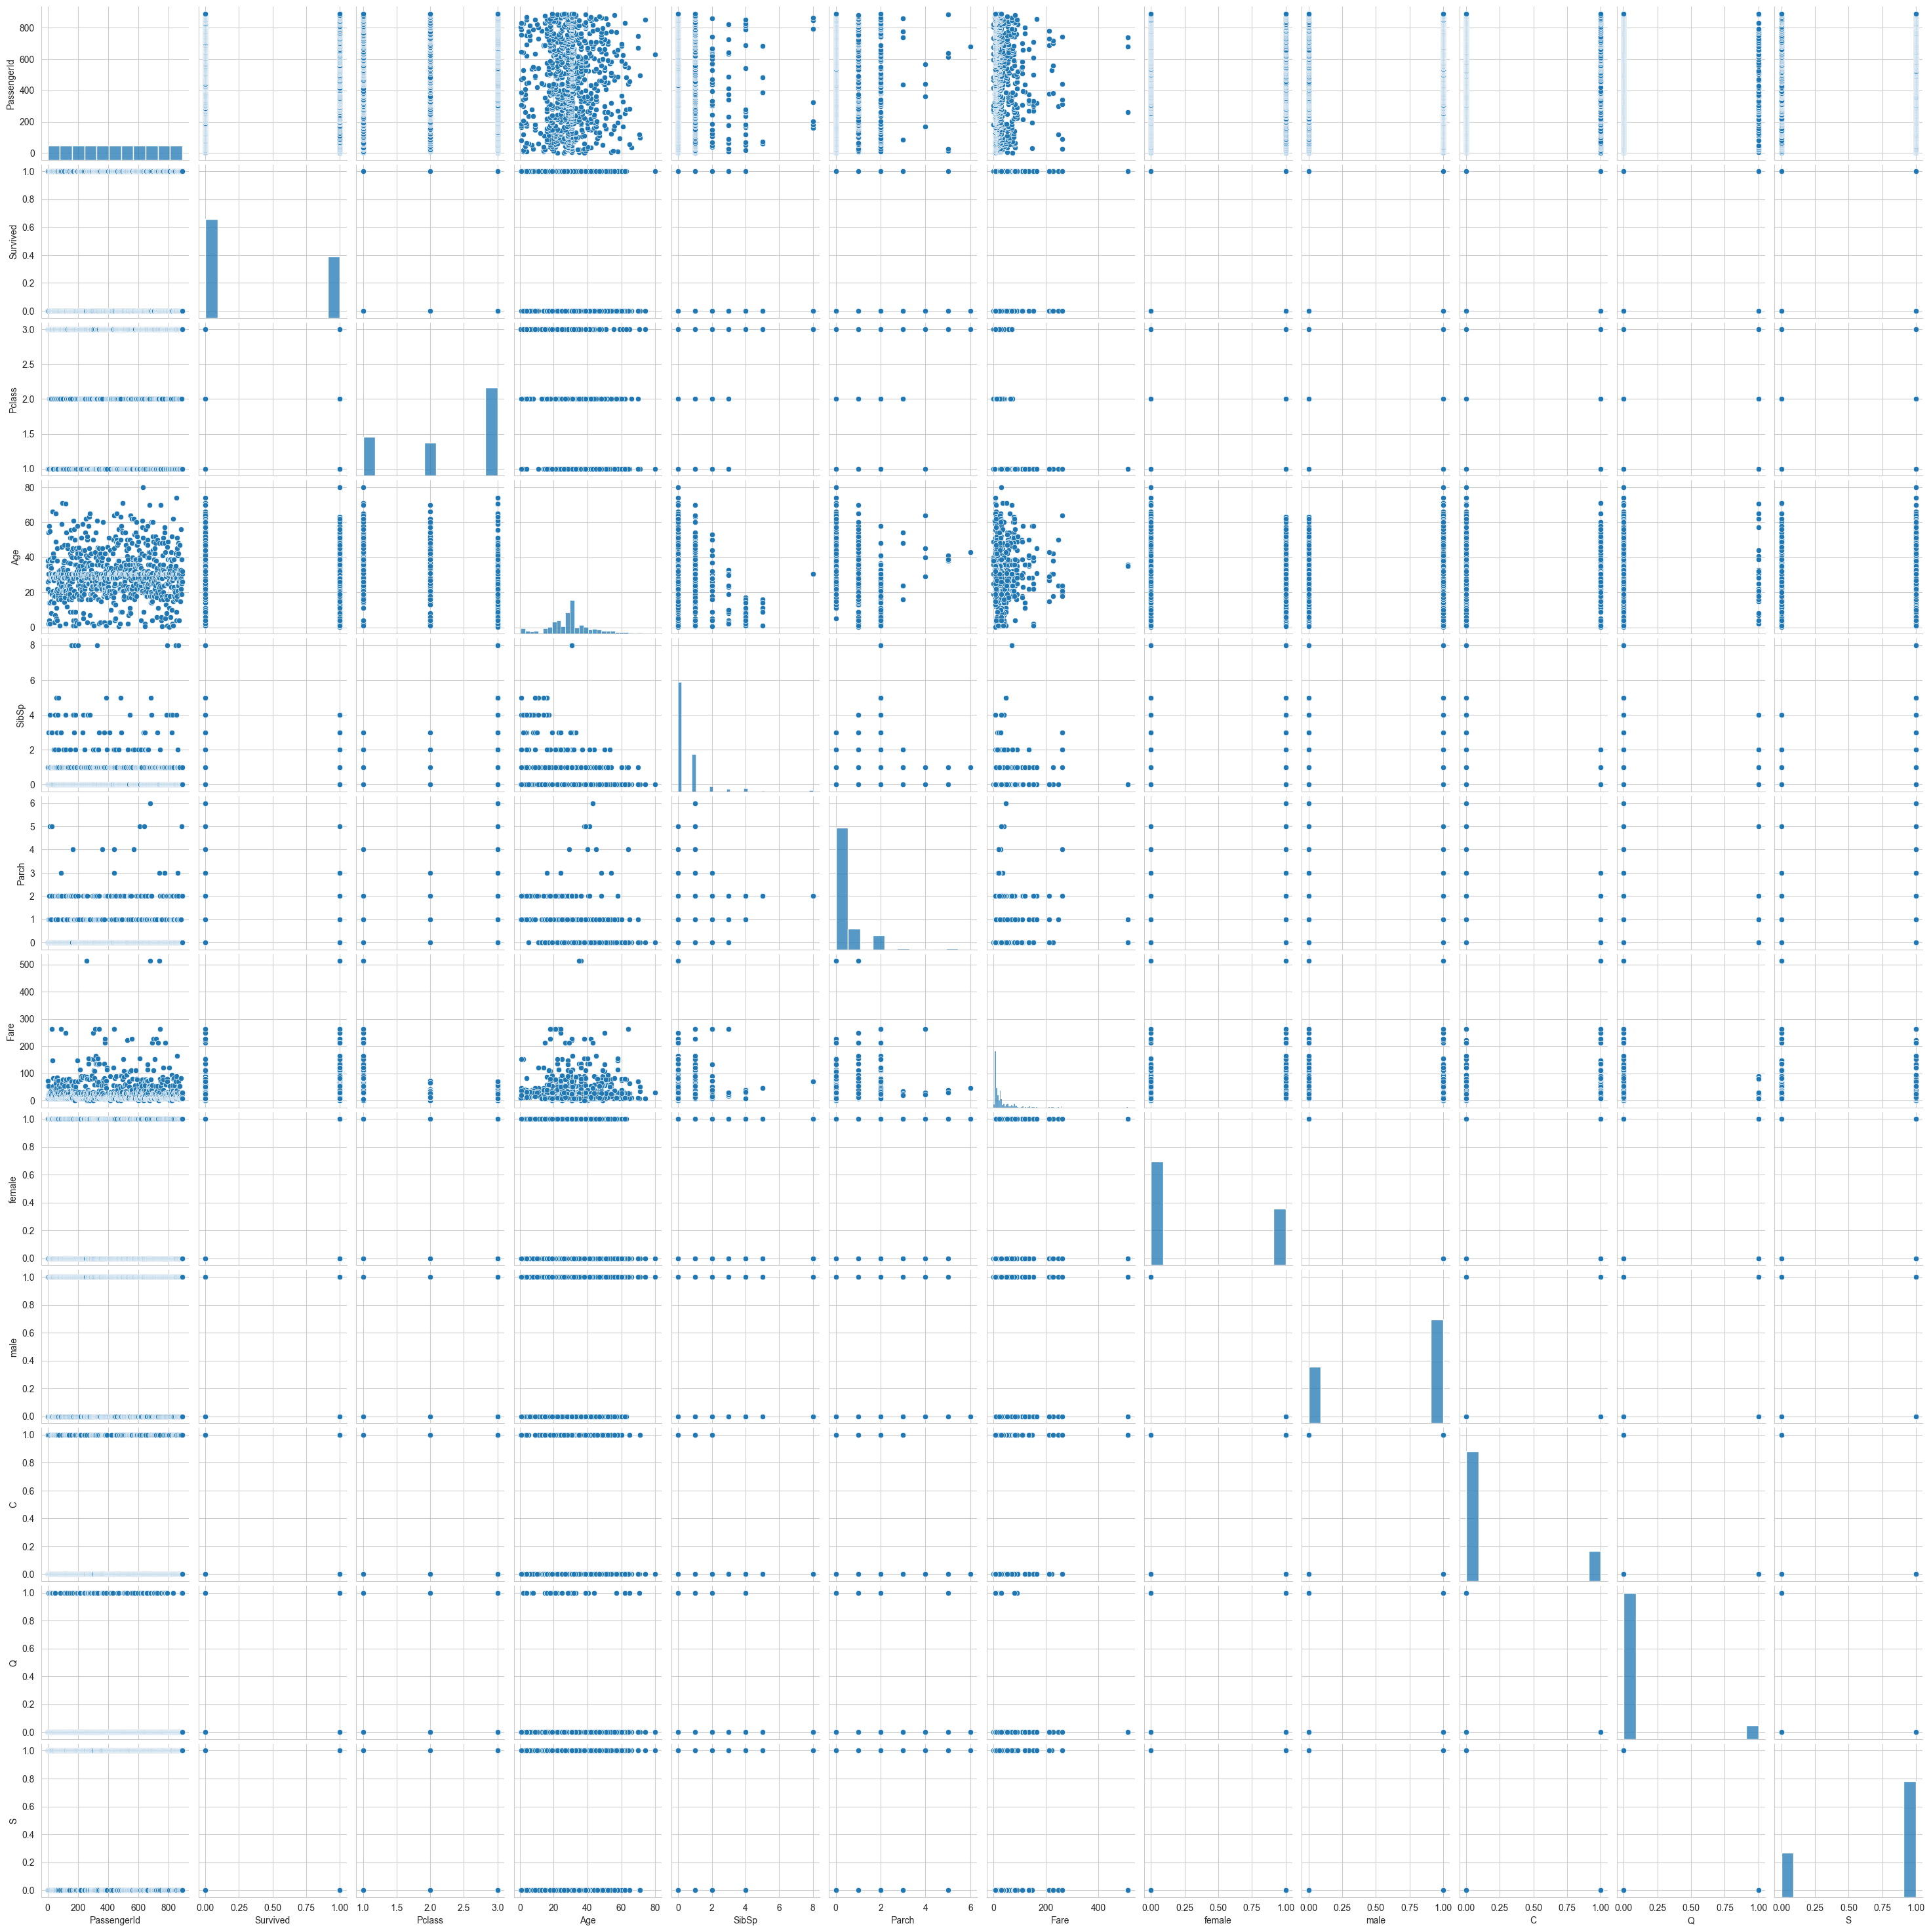

In [53]:
sns.pairplot(data)

PassengerId    891
Survived         2
Pclass           3
Age             90
SibSp            7
Parch            7
Fare           248
female           2
male             2
C                2
Q                2
S                2
dtype: int64

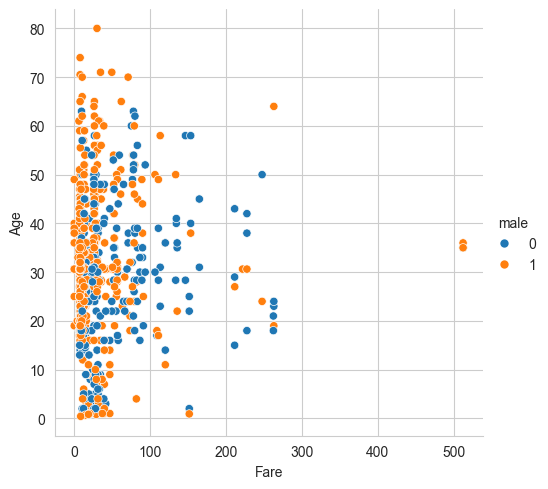

In [69]:
# scatter plot to see relation between 2 numerical variables

# sns.relplot(x = "Pclass" , y= "Age" , hue = "Survived" , data = data )
# data.nunique()
sns.relplot(data=data, x="Fare", y="Age", hue="male", kind="scatter")



